# Importing all Libraries 

In [6]:
import sys 
import pandas as pd
import numpy as np
import sklearn 
import scipy 
import matplotlib 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn


In [7]:
from pandas.plotting import scatter_matrix 
from sklearn import model_selection 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split


# Collecting/importing the Data 


In [10]:
names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels'] 
df = pandas.read_csv("D:\Oasis Internship\Iris.csv",names=names)

NameError: name 'pandas' is not defined

In [11]:
df = pd.read_csv("D:\Oasis Internship\Iris.csv")

In [12]:
#print(df)
df.pop('Id')
print(df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [13]:
sorted(df)

['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm', 'Species']

# importing pandas module


In [14]:

import pandas as pd
  
# making data frame from csv file
data = pd.read_csv("nba.csv", index_col ="Name")
  
  
# changing cols with rename()
new_data = data.rename(columns = {"Team":"Team Name",
                                 "College":"Education",
                                 "Salary":"Income"})
  
# changing columns using .columns()
data.columns = ['Team Name', 'Number', 'Position', 'Age',
               'Height', 'Weight', 'Education', 'Income']
  
# dropna used to ignore na values
print(new_data.dropna()== data.dropna())

FileNotFoundError: [Errno 2] No such file or directory: 'nba.csv'

In [15]:
df = df.rename(columns={'SepalLengthCm':'Sepal_Length',
                        'SepalWidthCm':'Sepal_Width',
                        'PetalLengthCm':'Petal_Length',
                        'PetalWidthCm': 'Petal_Width',
                        'Species':'Target'})
print(df.head())

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width       Target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


# cleaning and refining of DataSet [remove Duplicates, Null values] 

In [16]:
# Check Datatypes
df.dtypes

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Target           object
dtype: object

In [17]:
# remove duplicates from dataset 
df.drop_duplicates()
    
# remove rows with any null values
df.dropna(axis=0)

# remove columns with any null values
df.dropna(axis=1)

# # remove unwanted characters
# df = df.replace(to_replace=r'[^a-zA-Z0-9_]', value=' ', regex=True)

# # remove unwanted columns
# df = df.drop(columns=['column_name1', 'column2_name2'])

# # remove unwanted rows
# df = df[~df['column3'].isin(['value1', 'value2'])]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
# null value 
df.isnull().sum()


Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Target          0
dtype: int64

# Some Basic Statistical Analysis and visualization in  the dataset

In [19]:
print(df.describe())

       Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


# Correlations
 The Seaborn library has a great heat map visual for 
 mapping the correlations between features. The higher 
 the number is, the greater the correlation between 
 the two elements. A high positive correlation indicates
 that the two elements have a positive linear relationship
 (as one increases the other also increases), and a low negative
 correlation indicates a negative linear relationship
 (as one increases the other decreases).

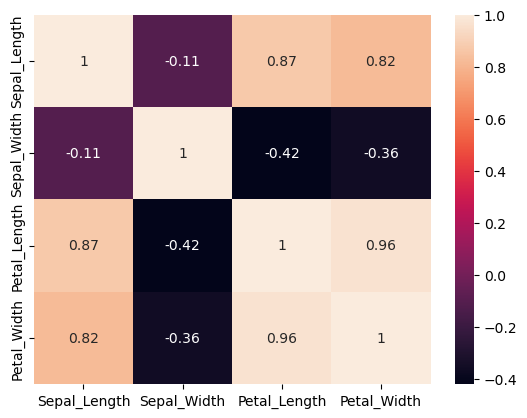

In [20]:


import seaborn as sns
sns.heatmap(df.corr(), annot = True);
#annot = True adds the numbers onto the squares

Petal length and width is most correlated with the target, meaning that as these numbers 
increase, so does the target value. In this case, it means that flowers in class 2 often 
have longer petal length and width than flowers in class 0. Sepal width is most anti-correlated,
indicating that flowers in class 0 have the greatest sepal width than those in class 2.
We can also see some intercorrelation between features, for example petal width and length are 
also highly correlated. This information is not necessarily the best way to analyze the data,
but it allows us to start seeing these relationships.



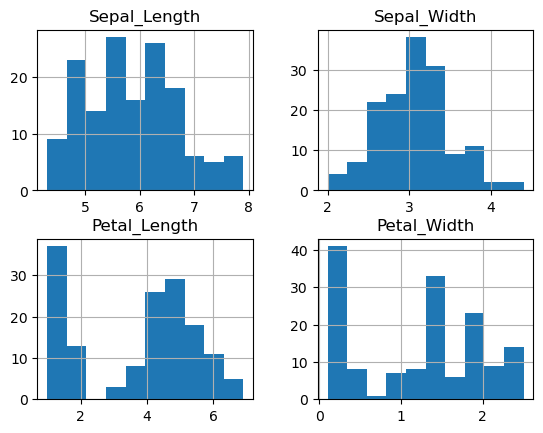

In [21]:
df.hist()
plt.show()

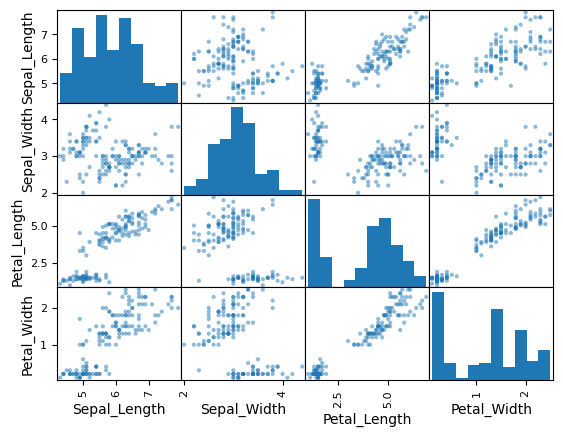

In [22]:
#This Shows that it has High Correlation And Predictible Realationship 

scatter_matrix(df)
plt.show()




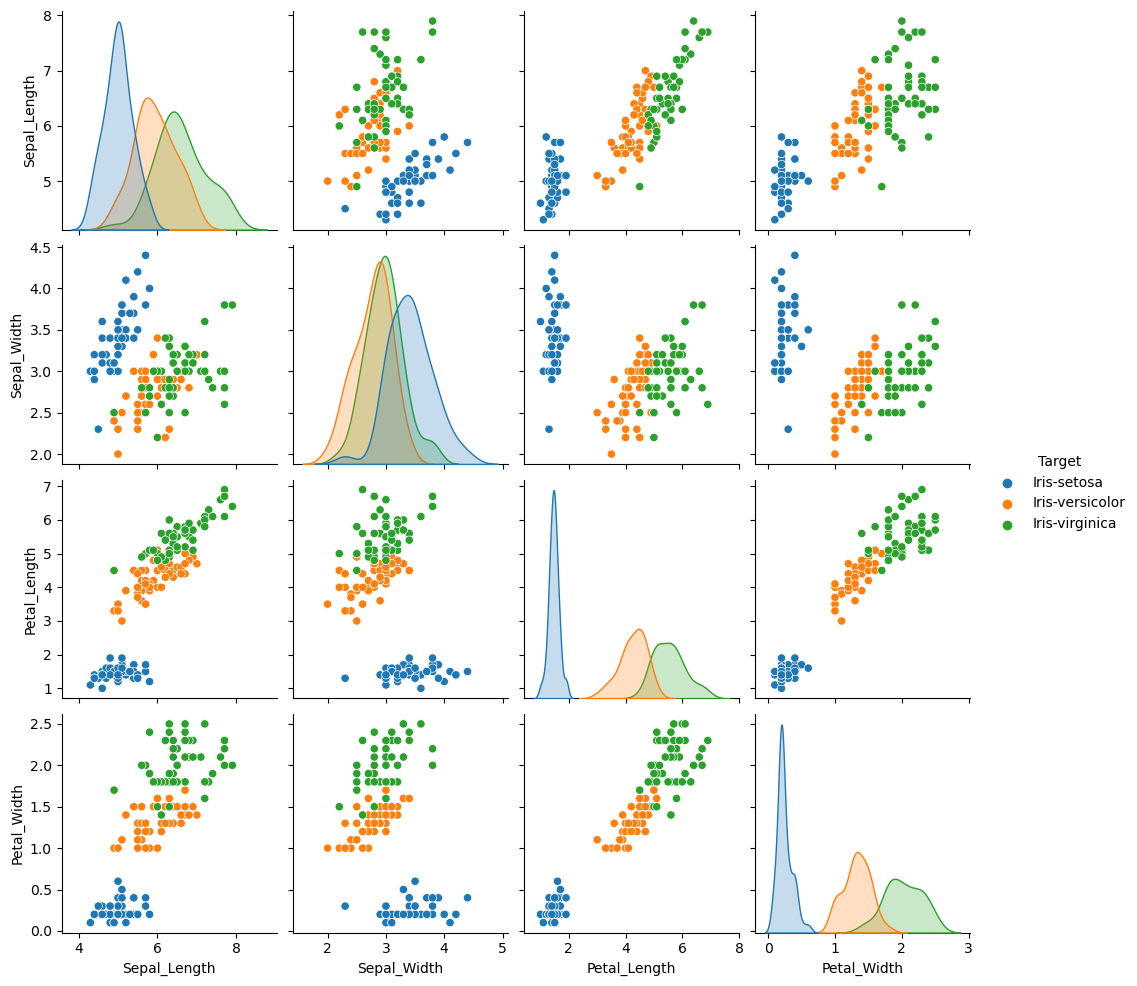

In [23]:
# Visualize the whole dataset
seaborn.pairplot(df, hue='Target')

In [25]:
# Separate features and target  
data = df.values
X = data[:,0:4]
Y = data[:,4]

In [46]:
# Calculate average of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4,3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(df.columns)-1)
width = 0.25



NameError: name 'columns' is not defined

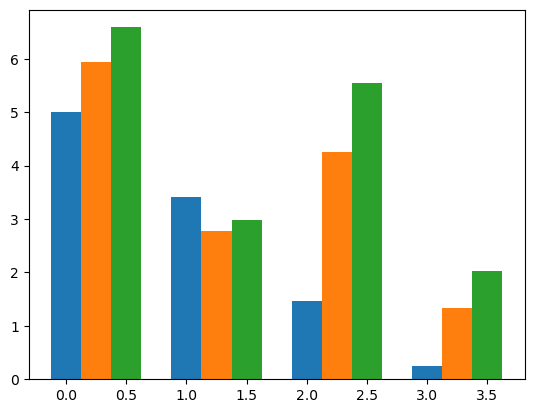

In [47]:
# Plot the average
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

# Model Training 
Here we imported a support vector classifier from the scikit-learn support vector machine.
Then, we created an object and named it svn.
After that, we feed the training dataset into the algorithm by using the svn.fit() method.

# *Modeling
Now that we have cleaned and explored the data, we can begin to develop a model. Our goal is to create 
a Logistic Regression classification model that will predict which class the flower is based on petal and sepal sizes.

In [49]:
#divide our data into predictors (X) and target values (y)
X = df.copy()
Y = X.pop('Target')

In [50]:
# Split the data to train and test dataset.

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# *Standardize
With the X values split between training and test, 
now we can standardize the values. This puts the numbers on 
a consistent scale while keeping the proportional relationship between them.



In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# * Baseline Prediction
The baseline is the probability of predicting class before the model
is implemented. If the data is split into 2 classes evenly, there is already 
a 50% chance of randomly assigning an element to the correct class. 
The goal of our model is to improve on this baseline, or random prediction. 
Also, if there is a strong class imbalance (if 90% of the data was in class 1), 
then we could alter the proportion of each class to help the model predict more accurately.



In [52]:
df.Target.value_counts(normalize= True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Target, dtype: float64

In [54]:
from sklearn.linear_model import LogisticRegression
#create the model instance
model = LogisticRegression()
#fit the model on the training data
model.fit(X_train, y_train)
#the score, or accuracy of the model
model.score(X_test, y_test)


# Output = 0.9666666666666667
#the test score is already very high, but we can use the cross validated score to ensure the model's strength 

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=10)
print(np.mean(scores))

# Output = 0.9499999999999998

0.95


# Without any adjustments or tuning, this model is already performing
very well with a test score of .9667 and a cross validation score of .9499. 
This means that the model is predicting the correct class for the
flower about 95% of time. Much higher than the baseline of 33%!

In [56]:
Understanding the Predictions
Normally there will be lots of fine tuning and experimentation with parameters 
to find the model that performs with the highest scores. However, since this data set was straightforward, 
we can move on for now and start looking at how the model made its predictions.

SyntaxError: invalid syntax (3445690314.py, line 1)

# ****Coefficients

Coefficients are often a bit hard to interpret in Logistic Regression,
but we can get an idea of how much of an impact each of the features
had in deciding if a flower belonged to that class. For instance, petal length was barely a
deciding factor for if a flower was in class 1, but petal width was a strong predictor for class 2.

In [57]:
df_coef = pd.DataFrame(model.coef_, columns=X_train.columns)
df_coef

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,-1.101046,1.069776,-1.812700,-1.684158
1,0.485084,-0.245492,-0.240729,-0.735523
2,0.615962,-0.824284,2.053429,2.419682


# **Predicted Values
predictions = model.predict(X_test)
#compare predicted values with the actual scores
compare_df = pd.DataFrame({'actual': y_test, 'predicted': predictions})
compare_df = compare_df.reset_index(drop = True)
compare_df

In [63]:
predictions = model.predict(X_test)
#compare predicted values with the actual scores
compare_df = pd.DataFrame({'actual': y_test, 'predicted': predictions})
compare_df = compare_df.reset_index(drop = True)
compare_df

,actual,predicted
0,Iris-virginica,Iris-virginica
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-virginica,Iris-virginica
4,Iris-virginica,Iris-virginica
5,Iris-virginica,Iris-virginica
6,Iris-setosa,Iris-setosa
7,Iris-versicolor,Iris-versicolor
8,Iris-versicolor,Iris-versicolor
9,Iris-virginica,Iris-virginica


# Confusion Matrix
To look more closely at the predictions that the model made, we can use
the confusion matrix. In the confusion matrix, the predicted values are
the columns and the actual are the rows. It allows us to see where the
model makes true and false predictions,
and if it predicts incorrectly, we can see which class it is predicting falsely.

In [64]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, predictions, 
                              labels=['Iris-virginica', 'Iris-versicolor','Iris-setosa' ]),
             index=['Iris-virginica', 'Iris-versicolor','Iris-setosa'],
             columns=['Iris-virginica', 'Iris-versicolor','Iris-setosa'])

,Iris-virginica,Iris-versicolor,Iris-setosa
Iris-virginica,12,0,0
Iris-versicolor,1,10,0
Iris-setosa,0,0,7


# Classification Report
Another good way to check how your model is performing is by looking at the classification report.
It shows the precision, recall, 
f1 scores, and accuracy scores, and below is a very brief explanation of these features.

Precision: Number of correctly predicted Iris Virginica flowers (10) out of total number of predicted Iris Virginica flowers(10).
    Precision in predicting Iris Virginica =10/10 = 1.0
Recall: Number of correctly predicted Iris Virginica out of the number of actual Iris Virginica. Recall = 9/10 = .9
F1 Score: This is a harmonic mean of precision and recall. 
    The formula is F1 Score = 2* (precision * recall) / (precision + recall)
Accuracy: Add all the correct predictions together for all classes and divide by the total number of predictions. 
    29 correct predictions /30 total values = accuracy of .9667.

In [154]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.82      0.90        11
 Iris-virginica       0.78      1.00      0.88         7

       accuracy                           0.93        30
      macro avg       0.93      0.94      0.92        30
   weighted avg       0.95      0.93      0.93        30



# *Predicted Probabilities
Using the code below we can look at the probabilities of each row of
data being assigned to one of the three classes. By default, the model 
will assign the item to the class with the highest probability. If we wanted to 
adjust the accuracy or precision, we could do this by changing the threshold of
how high the predicted probability would have to be before it was assigned to that class.

In this case, there is not a consequence to incorrectly assigning a flower
to another class, but models used to detect cancer cells adjust their models to 
‘assume the worst’ and assign it as a true cancer cell more often. 
This is used in many cases when it is better to be over cautious than
mislabel the cell as safe and healthy.

In [148]:
probs = model.predict_proba(X_test)

#put the probabilities into a dataframe for easier viewing


Y_pp = pd.DataFrame(model.predict_proba(X_test), 
             columns=['Setosa', 'Versicolor', 'Verginica'])
Y_pp.head()

,Setosa,Versicolor,Verginica
0,0.025674,0.937595,3.673119e-02
1,0.967116,0.032884,2.617860e-07
2,0.000172,0.098842,9.009861e-01
3,0.003557,0.384936,6.115069e-01
4,0.984292,0.015708,6.445724e-08
